In [4]:
import scipy.optimize as optimize
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Unconstrained Optimization
F = x^2 + y^2

In [7]:
def f(X):
    return X[0]**2+X[1]**2

In [8]:
X = [1,1]
minimum = optimize.fmin(f, X, full_output = True)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 69


In [12]:
minimum

(array([-2.10235293e-05,  2.54845649e-05]), 1.0914518324593772e-09, 38, 69, 0)

# Constrained Optimization
F = (x-1)^2 + (y-2.5)^2

In [13]:
def fun(x):
    return (x[0]-1)**2+(x[1]-2.5)**2

In [15]:
# Equality constraint means that the constraint function result is to be zero whereas inequality means that 
# it is to be non-negative.
cons = ({'type':'ineq', 'fun':lambda x:x[0] - 2*x[1] + 2},
        {'type':'ineq', 'fun':lambda x:-x[0] - 2*x[1] + 6},
        {'type':'ineq', 'fun':lambda x:-x[0] + 2*x[1]+2})
bounds = ((0,None),(0,None))

In [16]:
res = optimize.minimize(fun,np.array([2,0]),method = 'SLSQP', bounds = bounds, constraints= cons)

In [17]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

# Root Finding
x^3 - 1

In [18]:
def f(x):
    return x**3-1
def fprime(x):
    return 3*x**2

In [21]:
sol = optimize.root_scalar(f = f, x0=0.2, fprime = fprime, method = 'newton')

In [22]:
sol

      converged: True
           flag: 'converged'
 function_calls: 22
     iterations: 11
           root: 1.0

# ODEs

In [12]:
def odes(t,x):
    Y = x[0]
    P = x[1]
    dYdt = (-0.4*Y)+(0.02*P*Y)
    dPdt = (0.8*P)-(0.01*P**2)-(0.1*P*Y)
    return [dYdt,dPdt]

In [13]:
t = np.array([0,60])
times = np.linspace(t[0],t[1],6000)
x0 = [20, 20]

In [14]:
sol = solve_ivp(odes, [t[0],t[1]], y0 = x0, t_eval = times)

In [16]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  5.999e+01  6.000e+01]
        y: [[ 2.000e+01  2.000e+01 ...  5.978e+00  5.978e+00]
            [ 2.000e+01  1.972e+01 ...  1.993e+01  1.993e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 164
     njev: 0
      nlu: 0

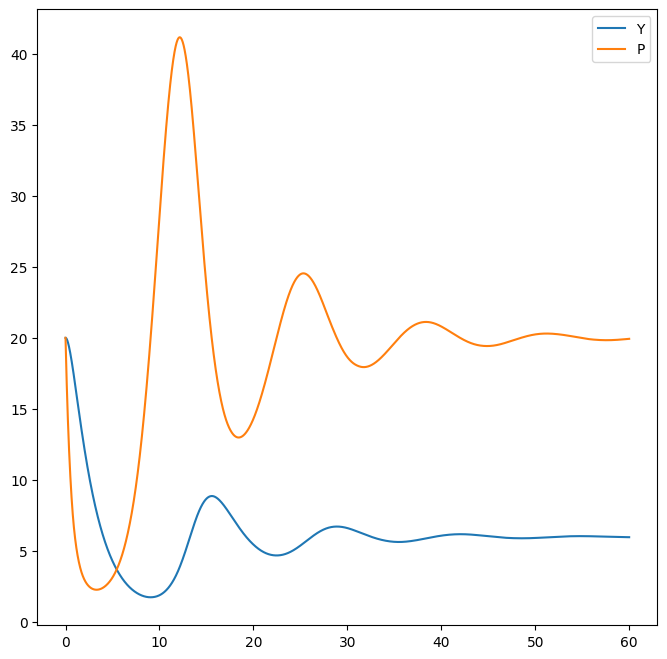

In [15]:
plt.figure(figsize = (8,8))
plt.plot(sol.t,sol.y[0],label='Y')
plt.plot(sol.t,sol.y[1], label= 'P')
plt.legend()
plt.show()

# Test

In [1]:
def func(x):
    return (x[0]-2)**2 + (x[1]-2)**2

cons = ({'type':'ineq', 'fun' : lambda x:(x[0] + x[1] - 2)})
bounds = ((0, None), (0,None))

In [5]:
res = optimize.minimize(func,np.array([2,0]),method = 'SLSQP', bounds = bounds, constraints= cons)

In [6]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0
       x: [ 2.000e+00  2.000e+00]
     nit: 2
     jac: [ 1.490e-08  1.490e-08]
    nfev: 7
    njev: 2